                                            NOTEBOOK PARA ANÁLISE DE DADOS PROJETO-FINAL-ICD

In [236]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

    Lendo o csv e o transformando em um dataframe

In [237]:
data = pd.read_csv(r"/home/vinicius_olzon/Documents/Projeto-Final-ICD/top10s.csv")
df = pd.DataFrame(data)

In [238]:
df.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


    Análise e tratamento dos dados


In [239]:
df.isnull().values.any()
df.isna().values.any()

False

    Medidas de centralidade e dispersão

In [240]:
musics = df.drop("Unnamed: 0", axis = 1)

    Qual o grau de positividade das músicas mais populares entre 2010 e 2019?


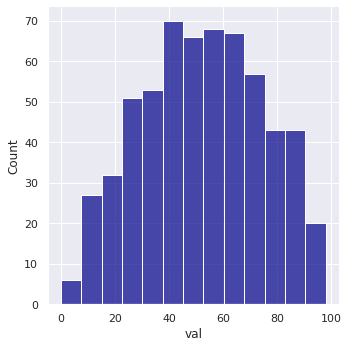

In [241]:
sns.displot(x= "val", data=musics, alpha=0.7, color = "darkblue")


    Qual a duração em média das músicas mais populares entre 2010 e 2019?


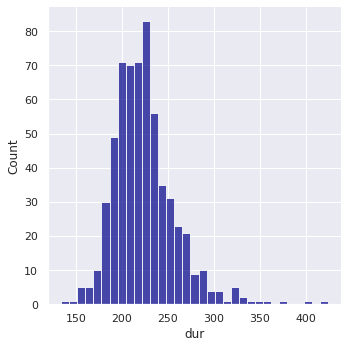

In [242]:
sns.displot(x= "dur", data=musics, alpha=0.7, color = "darkblue")


    Quais são 10 artistas com a maior quantia de músicas populares entre 2010 e 2019?

In [258]:
most10 = musics.value_counts("artist").head(10)
most10df = pd.DataFrame(most10)
most10df

,0
artist,
Katy Perry,17
Justin Bieber,16
Maroon 5,15
Rihanna,15
Lady Gaga,14
Bruno Mars,13
Pitbull,11
The Chainsmokers,11
Shawn Mendes,11


    Boxplot da duração das músicas em segundos

<AxesSubplot:ylabel='dur'>

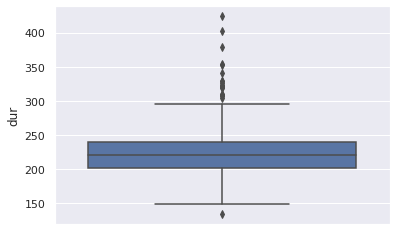

In [244]:
sns.boxplot(y = "dur",data = musics)


    Boxplot sobre a positividade das músicas


<AxesSubplot:ylabel='val'>

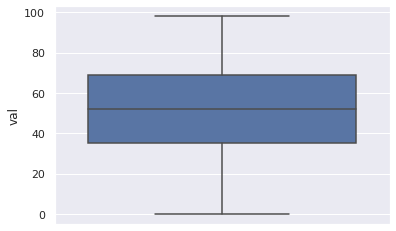

In [245]:
sns.boxplot(y = "val",data = musics)


    Boxplot do BPM das músicas (Batidas por minuto)

<AxesSubplot:ylabel='bpm'>

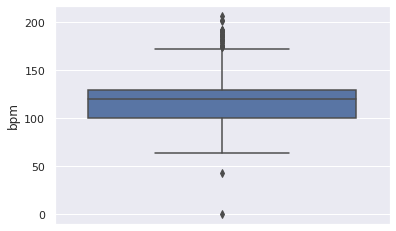

In [246]:
sns.boxplot(y = "bpm", data=musics)

    Scatterplot da relação entre energia e acusticidade das músicas

<AxesSubplot:xlabel='nrgy', ylabel='acous'>

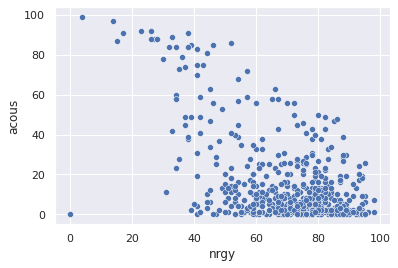

In [247]:
sns.scatterplot(data = musics, x = 'nrgy', y = 'acous')

    Índices de correlação entre as características musicais

In [248]:
corr = musics.corr().round(decimals = 4)
corr.style.background_gradient(cmap='coolwarm')

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
year,1.000000,-0.104200,-0.225600,0.079300,-0.126500,-0.136300,-0.122000,-0.215300,0.101700,0.004800,0.241300
bpm,-0.104200,1.000000,0.126200,-0.131300,0.183900,0.081600,0.016000,-0.029400,-0.113300,0.059000,0.019000
nrgy,-0.225600,0.126200,1.000000,0.167200,0.537500,0.186700,0.409600,-0.143600,-0.562300,0.107300,-0.057600
dnce,0.079300,-0.131300,0.167200,1.000000,0.233200,-0.028800,0.501700,-0.176800,-0.240100,-0.028000,0.116100
dB,-0.126500,0.183900,0.537500,0.233200,1.000000,0.081900,0.282900,-0.104700,-0.190400,-0.001100,0.156900
live,-0.136300,0.081600,0.186700,-0.028800,0.081900,1.000000,0.020200,0.098300,-0.098200,0.144100,-0.075700
val,-0.122000,0.016000,0.409600,0.501700,0.282900,0.020200,1.000000,-0.262300,-0.249000,0.122000,0.039000
dur,-0.215300,-0.029400,-0.143600,-0.176800,-0.104700,0.098300,-0.262300,1.000000,0.091800,0.054600,-0.104400
acous,0.101700,-0.113300,-0.562300,-0.240100,-0.190400,-0.098200,-0.249000,0.091800,1.000000,0.002800,0.026700
spch,0.004800,0.059000,0.107300,-0.028000,-0.001100,0.144100,0.122000,0.054600,0.002800,1.000000,-0.041500


In [249]:
corr.style.background_gradient(cmap='coolwarm').set_properties(**{'font-size': '0pt'})

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
year,1.000000,-0.104200,-0.225600,0.079300,-0.126500,-0.136300,-0.122000,-0.215300,0.101700,0.004800,0.241300
bpm,-0.104200,1.000000,0.126200,-0.131300,0.183900,0.081600,0.016000,-0.029400,-0.113300,0.059000,0.019000
nrgy,-0.225600,0.126200,1.000000,0.167200,0.537500,0.186700,0.409600,-0.143600,-0.562300,0.107300,-0.057600
dnce,0.079300,-0.131300,0.167200,1.000000,0.233200,-0.028800,0.501700,-0.176800,-0.240100,-0.028000,0.116100
dB,-0.126500,0.183900,0.537500,0.233200,1.000000,0.081900,0.282900,-0.104700,-0.190400,-0.001100,0.156900
live,-0.136300,0.081600,0.186700,-0.028800,0.081900,1.000000,0.020200,0.098300,-0.098200,0.144100,-0.075700
val,-0.122000,0.016000,0.409600,0.501700,0.282900,0.020200,1.000000,-0.262300,-0.249000,0.122000,0.039000
dur,-0.215300,-0.029400,-0.143600,-0.176800,-0.104700,0.098300,-0.262300,1.000000,0.091800,0.054600,-0.104400
acous,0.101700,-0.113300,-0.562300,-0.240100,-0.190400,-0.098200,-0.249000,0.091800,1.000000,0.002800,0.026700
spch,0.004800,0.059000,0.107300,-0.028000,-0.001100,0.144100,0.122000,0.054600,0.002800,1.000000,-0.041500


    Índice de correlação entre a acusticidade e energia das músicas

In [250]:
corr_violence_romance = musics["acous"].corr(musics["nrgy"])
corr_violence_romance.round(decimals = 4)

-0.5623

    Análise dos índices de correlação com a exclusão da diagonal principal, a qual faz correlação consigo mesma. No caso, ela foi preenchida com os valores de 0, após isso, foi feito a análise a partir dos novos valores.


In [251]:
np.fill_diagonal(corr.values, 0)
corr

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
year,0.0000,-0.1042,-0.2256,0.0793,-0.1265,-0.1363,-0.1220,-0.2153,0.1017,0.0048,0.2413
bpm,-0.1042,0.0000,0.1262,-0.1313,0.1839,0.0816,0.0160,-0.0294,-0.1133,0.0590,0.0190
nrgy,-0.2256,0.1262,0.0000,0.1672,0.5375,0.1867,0.4096,-0.1436,-0.5623,0.1073,-0.0576
dnce,0.0793,-0.1313,0.1672,0.0000,0.2332,-0.0288,0.5017,-0.1768,-0.2401,-0.0280,0.1161
dB,-0.1265,0.1839,0.5375,0.2332,0.0000,0.0819,0.2829,-0.1047,-0.1904,-0.0011,0.1569
live,-0.1363,0.0816,0.1867,-0.0288,0.0819,0.0000,0.0202,0.0983,-0.0982,0.1441,-0.0757
val,-0.1220,0.0160,0.4096,0.5017,0.2829,0.0202,0.0000,-0.2623,-0.2490,0.1220,0.0390
dur,-0.2153,-0.0294,-0.1436,-0.1768,-0.1047,0.0983,-0.2623,0.0000,0.0918,0.0546,-0.1044
acous,0.1017,-0.1133,-0.5623,-0.2401,-0.1904,-0.0982,-0.2490,0.0918,0.0000,0.0028,0.0267
spch,0.0048,0.0590,0.1073,-0.0280,-0.0011,0.1441,0.1220,0.0546,0.0028,0.0000,-0.0415


    Índices de correlação mais/menos fortes após o tratamento

In [252]:
corr.max()

year     0.2413
bpm      0.1839
nrgy     0.5375
dnce     0.5017
dB       0.5375
live     0.1867
val      0.5017
dur      0.0983
acous    0.1017
spch     0.1441
pop      0.2413
dtype: float64

In [253]:
corr.min()

year    -0.2256
bpm     -0.1313
nrgy    -0.5623
dnce    -0.2401
dB      -0.1904
live    -0.1363
val     -0.2623
dur     -0.2623
acous   -0.5623
spch    -0.0415
pop     -0.1044
dtype: float64